In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore", UserWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

import datetime
# Any results you write to the current directory are saved as output.

['stage2_test_variants.csv', 'test_text', 'stage1_solution_filtered.csv', 'training_variants', 'training_text', 'stage2_sample_submission.csv', 'stage2_test_text.csv', 'test_variants', 'submissionFile']


## 1 EDA: 

In [51]:
# Training Data
train_v = pd.read_csv('../input/training_variants')
print('training_variants:')
print(train_v.info()) 
print(train_v.head(2))
print(' ')

# Training text
train_t = pd.read_csv('../input/training_text', sep='\|\|', header=None, skiprows=1, \
                      names=["ID","Text"],engine='python')
print('training_text:') 
print(train_t.info()) 
print(train_t.head(2))

# Stage 1 solution filtered data
s1_solution_f = pd.read_csv('../input/stage1_solution_filtered.csv')
print('Stage 1 solution filtered variants:') 
print(s1_solution_f.info()) 
print(s1_solution_f.head(2))
print(' ')

training_variants:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB
None
   ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
 
training_text:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
Text    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB
None
   ID                                               Text
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
Stage 1 solution filtered variants:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 10 columns):
ID     

In [69]:
# Test Data for prediction
test_v = pd.read_csv('../input/test_variants')
print('test_variants:') 
print(test_v.info())
print(test_v.head(2))
print(' ')
# Test Text
test_t = pd.read_csv('../input/test_text', sep='\|\|', header=None, skiprows=1, \
                      names=["ID","Text"],engine='python')
print('test_text:') 
print(test_t.info())
print(test_t.head(2))
print(' ')

# Submission csv 
submissionFile = pd.read_csv('../input/submissionFile')
print('SubmissionFile, this is the solution of test data')
print(submissionFile.info())
print(submissionFile.head(2))
print(' ')
print(' ')

# Stage 2 Test Data
s2_test_v = pd.read_csv('../input/stage2_test_variants.csv')
print('s2_test_variants:') 
print(s2_test_v.info())
print(s2_test_v.head(2))
print(' ')

# Stage2 submission file
s2_submissionFile = pd.read_csv('../input/stage2_sample_submission.csv')
print('Stage 2 submissionFile')
print(s2_submissionFile.info())
print(s2_submissionFile.head(2))

test_variants:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 3 columns):
ID           5668 non-null int64
Gene         5668 non-null object
Variation    5668 non-null object
dtypes: int64(1), object(2)
memory usage: 132.9+ KB
None
   ID   Gene Variation
0   0  ACSL4     R570S
1   1  NAGLU     P521L
 
test_text:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 2 columns):
ID      5668 non-null int64
Text    5667 non-null object
dtypes: int64(1), object(1)
memory usage: 88.6+ KB
None
   ID                                               Text
0   0  2. This mutation resulted in a myeloproliferat...
1   1   Abstract The Large Tumor Suppressor 1 (LATS1)...
 
SubmissionFile
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5668 entries, 0 to 5667
Data columns (total 10 columns):
ID        5668 non-null int64
class1    5668 non-null int64
class2    5668 non-null int64
class3    5668 non-null int64
class

### Join csv and text data

In [64]:
# Merge train variants and text by unique ID
print('Merge train text variants and text')
print(train_v.ID.unique())
print(train_t.ID.unique())
train = pd.merge(train_v,train_t,on='ID',how='left')
print(train.head(2))
print('')
# Merge test variants and text by unique ID
print('Merge test text variants and text')
print(test_v.ID.unique())
print(test_t.ID.unique())
test = pd.merge(test_v,test_t,on='ID',how='left')
print(test.head(2))

Merge train text variants and text
[   0    1    2 ... 3318 3319 3320]
[   0    1    2 ... 3318 3319 3320]
   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   

                                                Text  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  

Merge test text variants and text
[   0    1    2 ... 5665 5666 5667]
[   0    1    2 ... 5665 5666 5667]
   ID   Gene Variation                                               Text
0   0  ACSL4     R570S  2. This mutation resulted in a myeloproliferat...
1   1  NAGLU     P521L   Abstract The Large Tumor Suppressor 1 (LATS1)...


### Data Visulization

In [85]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)


# Example
createFolder('../plot/')
plot='../plot/'
os.listdir('..')

['lib', 'input', 'plot', 'working', 'config']

In [86]:
# Bar Plot: Count by colname 
def plot_col_count(df,colname,save_plot_dir):
    import seaborn as sns, matplotlib.pyplot as plt
    df=df.drop_duplicates()
    number = df[colname].value_counts().values
    number = [str(x) for x in number.tolist()]
    number = ['n: ' + i for i in number]
    ax = sns.countplot(x=colname,  data=df)
    
    pos = range(len(number))
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], + 0.1, number[tick], horizontalalignment='center', size='small', color='w', weight='semibold')    
    
    fig = ax.get_figure()
    
    #save plot
    name= str(colname)+'count'
    figname = '{}{:%Y%m%dT%H%M}.png'.format(os.path.join(save_plot_dir,name), datetime.datetime.now())
    fig.savefig(figname, figdpi = 300)

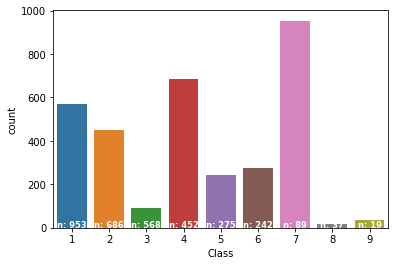

In [87]:
# Train dataset. count by Class
plot_col_count(train,'Class',plot)